In [83]:
import sys
import pandas as pd  #Software library for data manipulation and analysis 
import numpy as np #Library that provides support for multi-dimensional arrays and functions for those arrays
import sklearn #Free software machine learning library, contains various algorithms
from sklearn.ensemble import RandomForestClassifier #the machine learning model
from sklearn.model_selection import train_test_split #to split the data into test and train datasets
from sklearn.metrics import roc_curve, auc # For model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #For model evaluation
import matplotlib #Library that provides several functions for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns #Python data visualization library 


In [44]:
heart = pd.read_csv("Heart_Data.csv")

In [45]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
heart.shape  #Shape is a command that outputs the dimensions of a dataframe

(303, 14)

In [47]:
heart["thal"].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

You want to clean up your data. This can be done using the dropna command. It drops NaN from the dataset. If you set your axis to 0, it drops rows missing values. If axis is set to 1 it drops columns missing values

In [48]:
heart.dropna(axis=0)
heart.shape

(303, 14)

In [49]:
heart.dtypes #Allows you to see what kind of data we are working it.


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Here we want to work with numerical values which is what we see in all our variables

For preliminary analysis we might want to see if we can make any surface level relationships between our variables. We also want to see the overall distribution of our variables

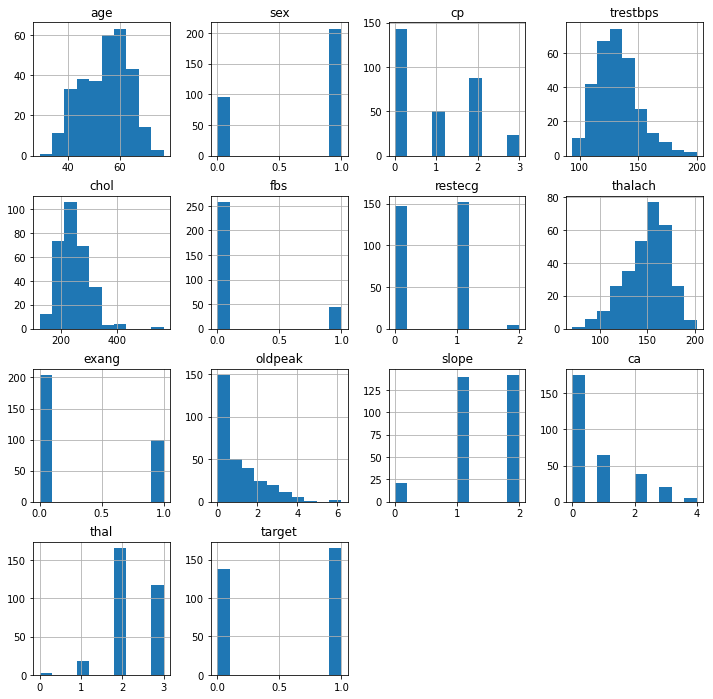

In [50]:
heart.hist(figsize = (12,12))
plt.show()

It looks like there's a relationship between Age and Thalach (maximum heart rate reached)
We can look at this relationship by making a scatterplot 

<function matplotlib.pyplot.show(close=None, block=None)>

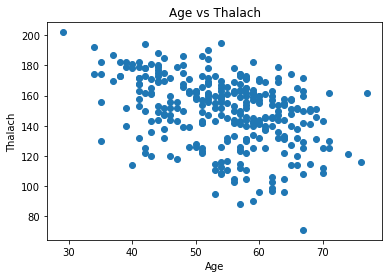

In [51]:
plt.title("Age vs Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.scatter(heart['age'],heart['thalach'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

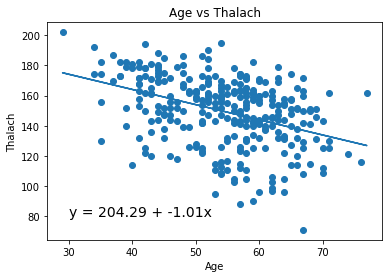

In [52]:
plt.title("Age vs Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.scatter(heart['age'],heart['thalach'])

a,b = np.polyfit(heart['age'],heart['thalach'],1) #Computes the slope and y-intercept for a line of best fit
plt.plot(heart['age'],a*heart['age']+b)   #For a linear line of best fit: y = mx + b. x = heart[age]
plt.text(30, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.show

plt.text(x, y, text, size = ...)
x and y coordinates where you want the text to be placed with relation to your axes
So not the greatest correlation between those variables
A great way to see if there is a correlation between variables is by using a heatmap. 
You can do that by using the seaborn library

<function matplotlib.pyplot.show(close=None, block=None)>

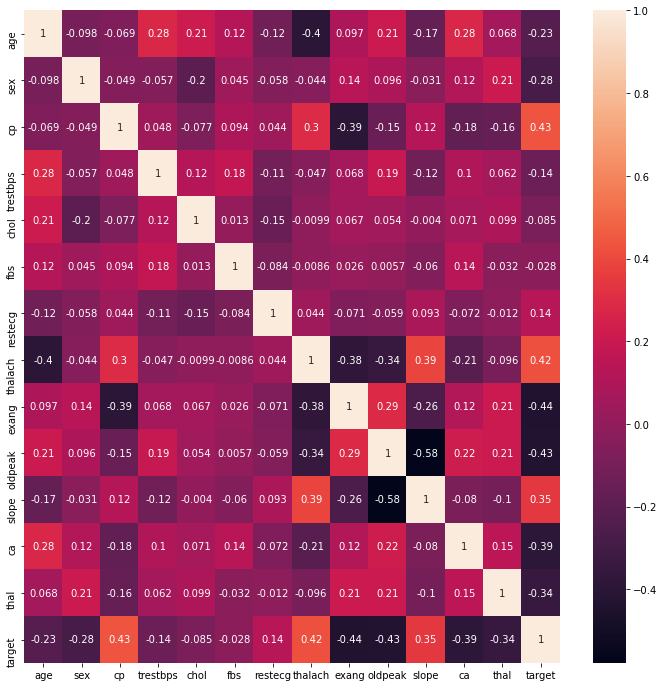

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(), annot = True)
plt.show

When you create a machine learning you want to split the data that you already have. Using the sklearn library we are going to use the train_test_split() function to separate our data into random test and training datasets

test_size = proportion of data in the test dataset, random_state = number of times the data is shuffled prior to the algorithm running

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(heart.drop('target',1), heart['target'], test_size = 0.2, random_state = 10)

model = RandomForestClassifier(max_depth = 7)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

In [85]:
y_predict = model.predict(X_test)
y_predict2 = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, y_predict)
confusion_matrix

array([[28,  7],
       [ 5, 21]], dtype=int64)

In [86]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8484848484848485
Specificity :  0.75


Sensitivity = True Positives/(True Positives + False Negatives)
Specificity = True Negatives/(True Negatives + False Positives)

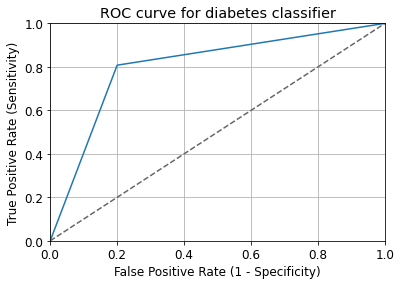

In [87]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".4")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [88]:
auc(fpr, tpr)

0.803846153846154

# In Progress
Add some more pylot graphs, ways of visualizing data \
Add explanations for ROC, AUC, Sensitivity and Specificity and why they matter\
Add explanation of how RandomForestModels work
- Maybe talk about other models (advantages/disadvantages) \

Add Markdown cells
- explain the code in more detail, why certain functions are used and how they work